In [1]:
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import xarray as xr
import metpy.calc as mcalc
from metpy.units import units
import cartopy.feature as cfeature
import japanize_matplotlib
from matplotlib.transforms import offset_copy

In [7]:
st_master=pd.read_excel("../config/radio_st_list.xlsx")

In [3]:
mlon=plt.MultipleLocator(10)
mlat=plt.MultipleLocator(10)

## 無地天気図

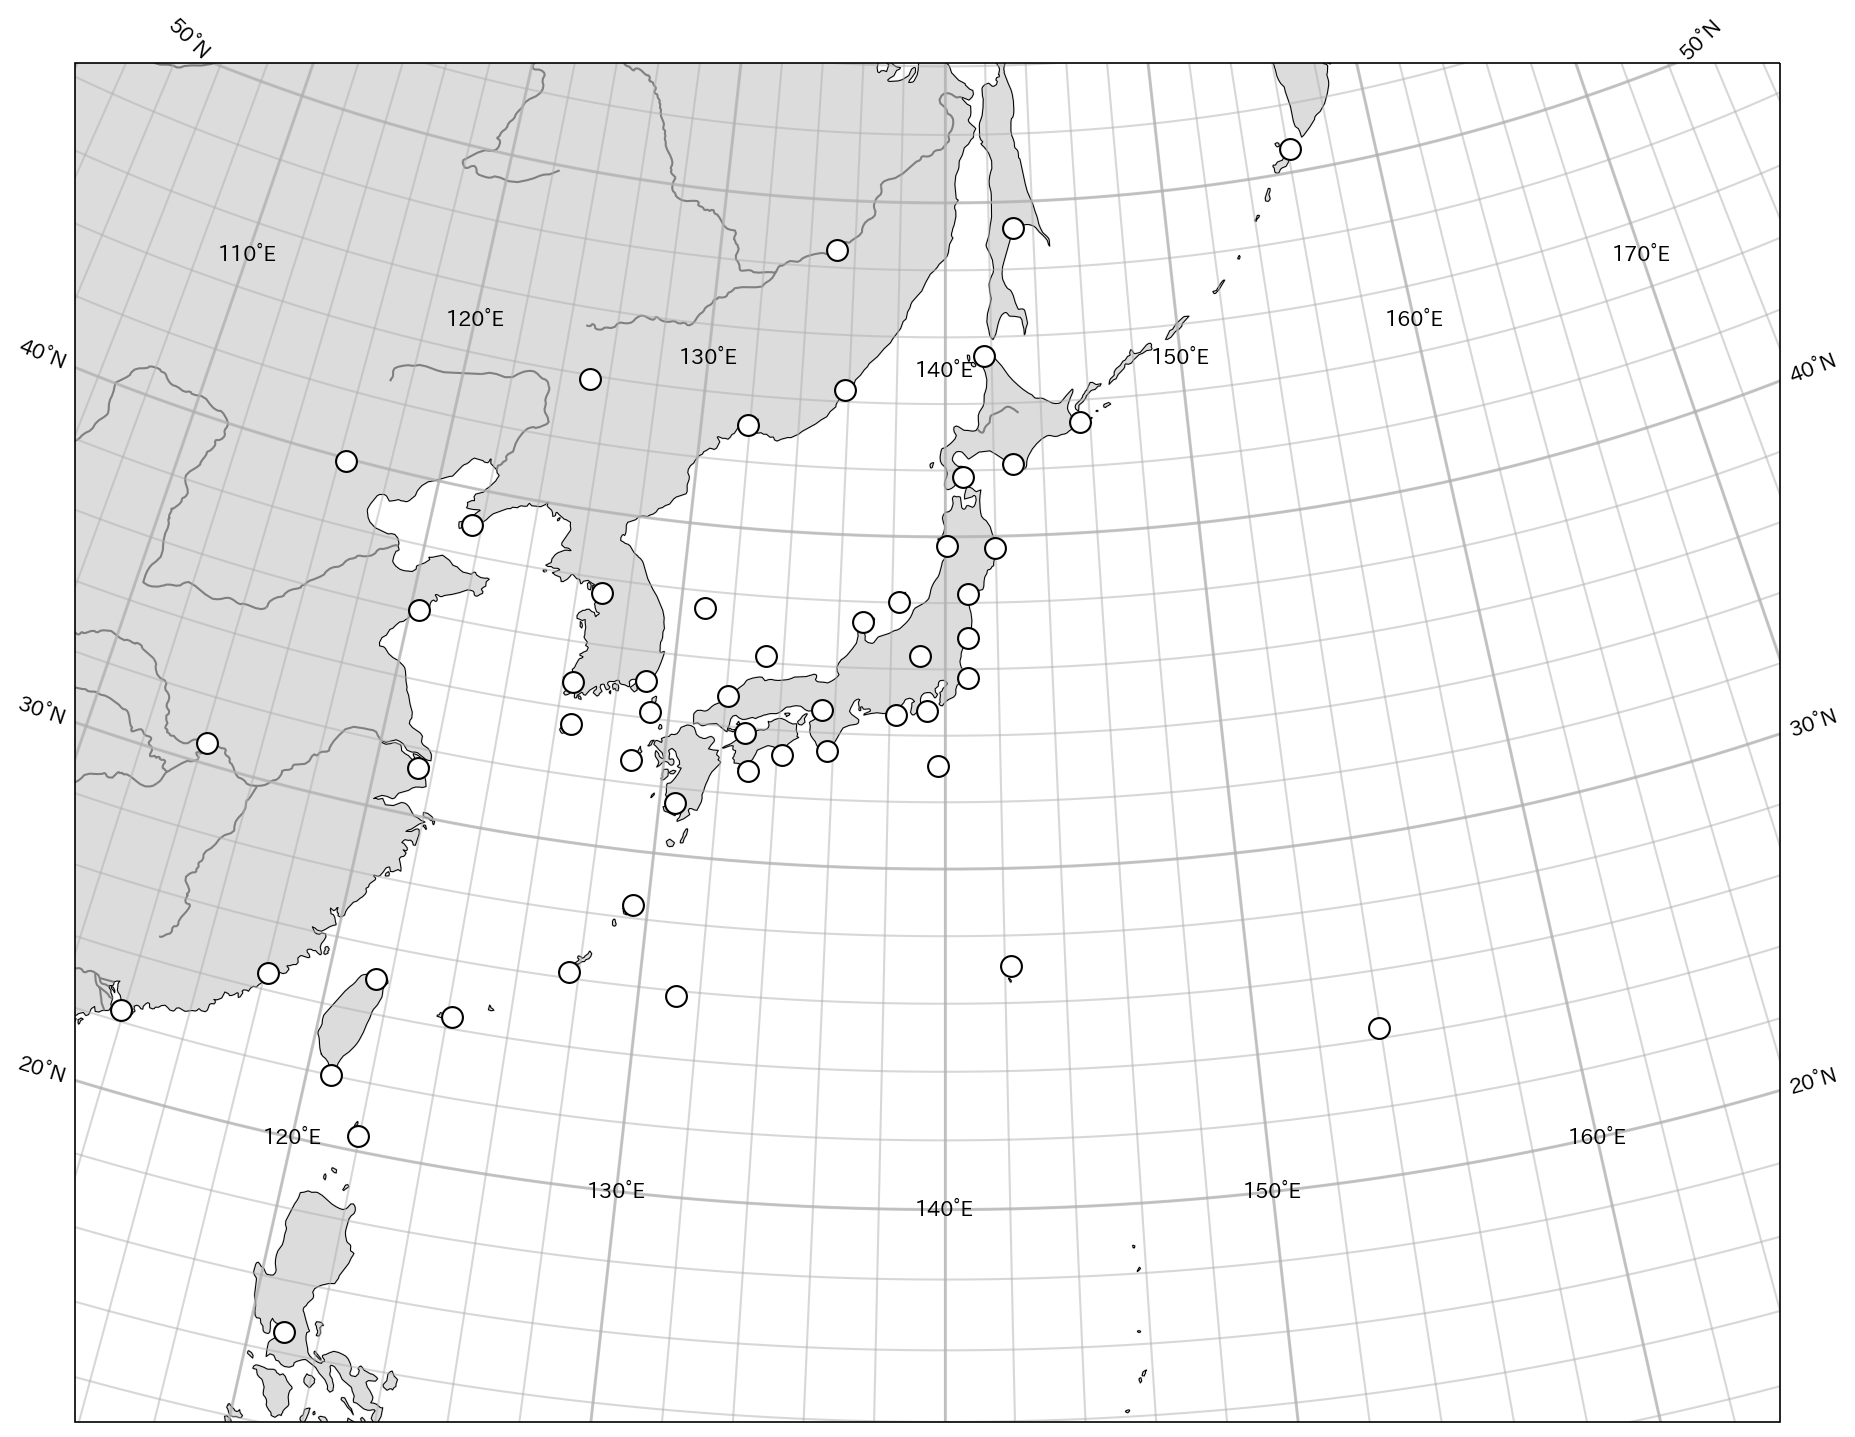

In [10]:
fig=plt.figure(figsize=(20,12),dpi=150)
ax=fig.add_subplot(1,1,1,projection=ccrs.LambertConformal(central_longitude=140, central_latitude=30))
ax.coastlines(resolution="50m", linewidth=0.5)
gl_minor=ax.gridlines(draw_labels=False, xlocs=plt.MultipleLocator(2), ylocs=plt.MultipleLocator(2),alpha=0.5, linewidth=1)
gl=ax.gridlines(draw_labels=True,xlocs=mlon,ylocs=mlat, linewidth=1.5,alpha=0.6)
ax.set_extent([115,164,14,52],crs=ccrs.PlateCarree())
ax.add_feature(cfeature.LAND,facecolor="gainsboro")
ax.add_feature(cfeature.RIVERS.with_scale("50m"),edgecolor="gray")

for lon,lat in zip(st_master["lon"], st_master["lat"]):
    ax.plot(lon,lat, marker="o", transform=ccrs.PlateCarree(), c="w", markeredgecolor="k",markersize=10)
fig.savefig("../map/blank_map.png", bbox_inches="tight")

## 初級者向け

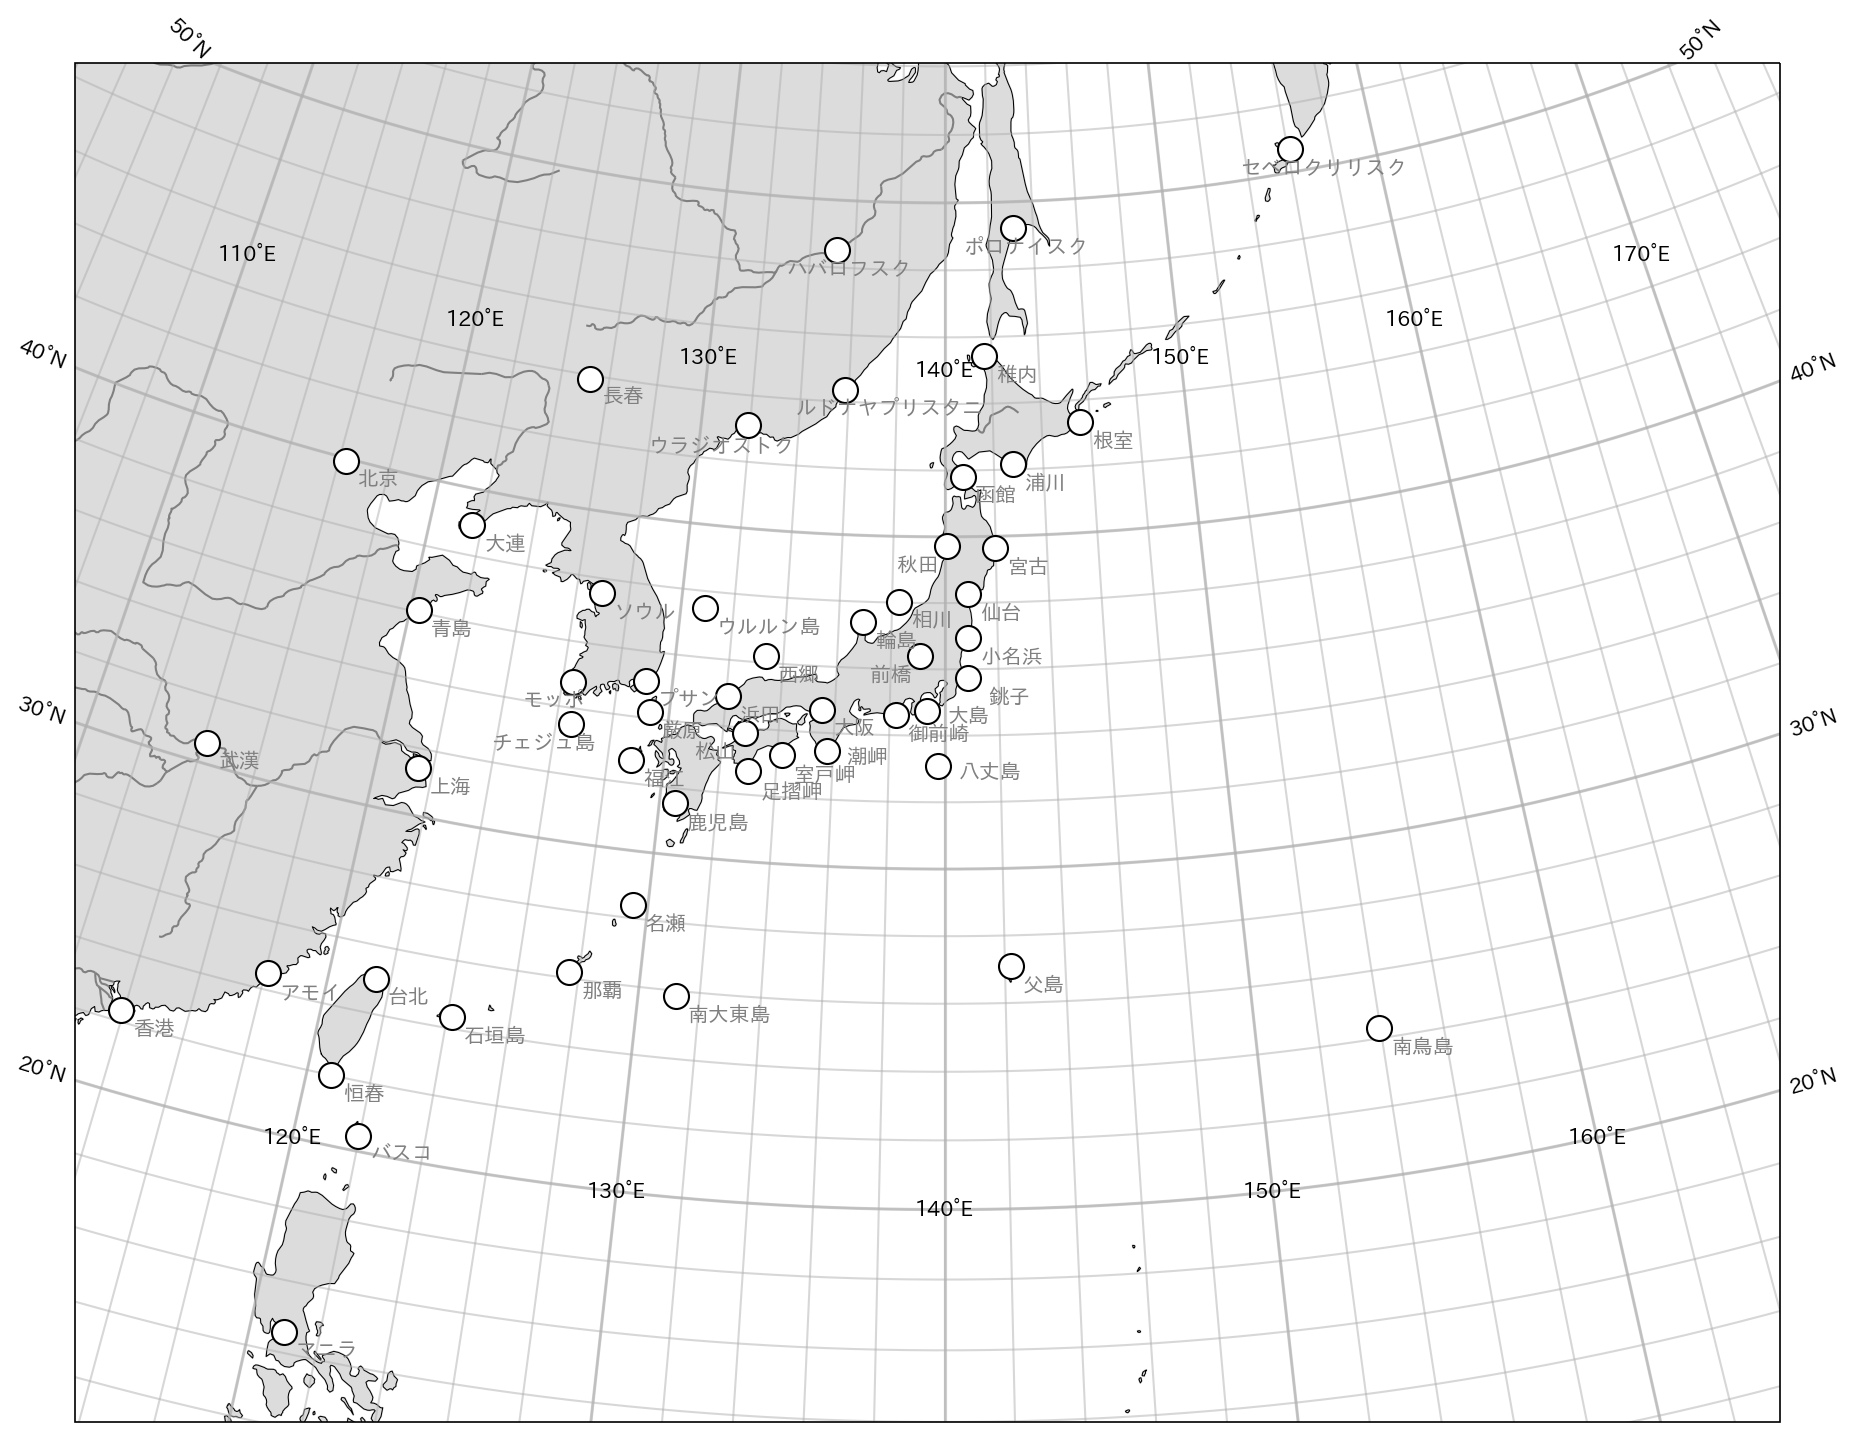

In [11]:

fig=plt.figure(figsize=(20,12),dpi=150)
ax=fig.add_subplot(1,1,1,projection=ccrs.LambertConformal(central_longitude=140, central_latitude=30))
ax.coastlines(resolution="50m",linewidth=0.5)
gl_minor=ax.gridlines(draw_labels=False, xlocs=plt.MultipleLocator(2), ylocs=plt.MultipleLocator(2),alpha=0.5, linewidth=1)
gl=ax.gridlines(draw_labels=True,xlocs=mlon,ylocs=mlat, linewidth=1.5,alpha=0.6)
ax.set_extent([115,164,14,52],crs=ccrs.PlateCarree())
ax.add_feature(cfeature.LAND,facecolor="gainsboro")
ax.add_feature(cfeature.RIVERS.with_scale("50m"),edgecolor="gray")

for lon,lat,st_name,x,y in zip(st_master["lon"], st_master["lat"],st_master["st_name"],st_master["x"], st_master["y"]):
    ax.plot(lon,lat, marker="o", transform=ccrs.PlateCarree(), c="w", markeredgecolor="k",markersize=12)
    text_transform=offset_copy(ccrs.Geodetic()._as_mpl_transform(ax),units="dots", x=x,y=y)
    ax.text(lon,lat, st_name, transform=text_transform,color="gray")
fig.savefig("../map/blank_map_with_label.png", bbox_inches="tight")

In [64]:
st_master

,Unnamed: 0,st_name,st_name_kana,lat,lon,alt,x,y
0,0,石垣島,いしがきじま,24.333333,124.166667,6.0,-50,12
1,1,那覇,なは,26.200000,127.683333,28.0,-50,12
2,2,南大東島,みなみだいとうじま,25.833333,131.233333,15.0,-50,12
3,3,名瀬,なぜ,28.383333,129.500000,3.0,-50,12
4,4,鹿児島,かごしま,31.550000,130.550000,4.0,-50,12
5,5,福江,ふくえ,32.700000,128.833333,25.0,-50,-12
6,6,厳原,いづはら,34.200000,129.300000,4.0,-50,-12
7,7,足摺岬,あしずりみさき,32.716667,133.016667,31.0,12,-25
8,8,室戸岬,むろとみさき,33.250000,134.183333,185.0,12,-25
9,9,松山,まつやま,33.833333,132.783333,32.0,-50,12


In [69]:
st_master.to

,Unnamed: 0,st_name,st_name_kana,lat,lon,alt,x,y
0,0,石垣島,いしがきじま,24.333333,124.166667,6.0,-50,12
1,1,那覇,なは,26.200000,127.683333,28.0,-50,12
2,2,南大東島,みなみだいとうじま,25.833333,131.233333,15.0,-50,12
3,3,名瀬,なぜ,28.383333,129.500000,3.0,-50,12
4,4,鹿児島,かごしま,31.550000,130.550000,4.0,-50,12
5,5,福江,ふくえ,32.700000,128.833333,25.0,-50,-12
6,6,厳原,いづはら,34.200000,129.300000,4.0,-50,-12
7,7,足摺岬,あしずりみさき,32.716667,133.016667,31.0,12,-25
8,8,室戸岬,むろとみさき,33.250000,134.183333,185.0,12,-25
9,9,松山,まつやま,33.833333,132.783333,32.0,-50,12


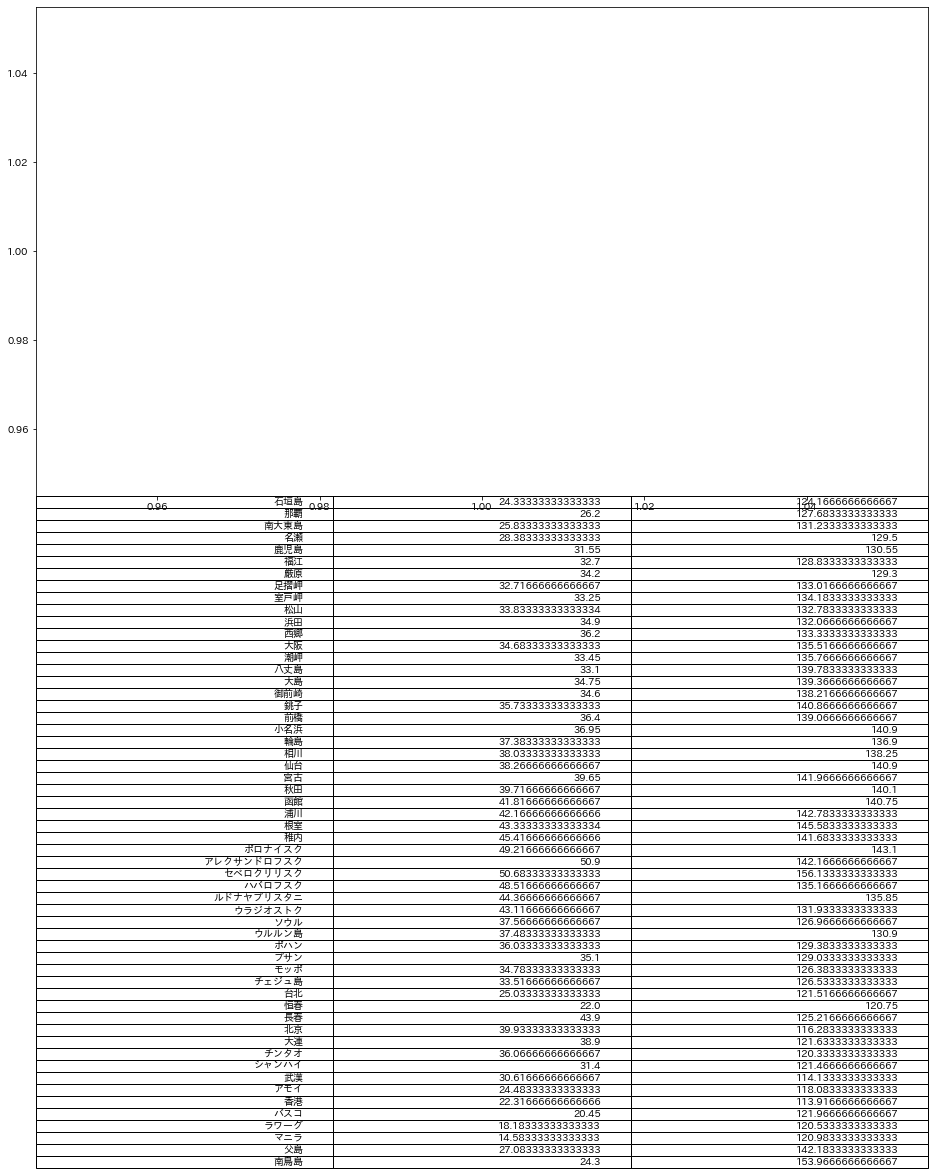

In [73]:
fig,ax=plt.subplots(figsize=(16,9))
ax.plot(1,1)
ax.table(st_master[["st_name","lat","lon"]].values)